# Dataset: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 01: Reading the data

In [ ]:
BX_Books = pd.read_csv('BX_Books.csv', error_bad_lines=False, encoding='iso-8859-1', sep = ';')

In [ ]:
BX_Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
BX_Users = pd.read_csv('BX-Users.csv', error_bad_lines=False, encoding='iso-8859-1', sep = ';')

In [ ]:
BX_Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
BX_Book_Ratings = pd.read_csv('BX-Book-Ratings.csv', error_bad_lines=False, encoding='iso-8859-1', sep = ';')

In [ ]:
BX_Book_Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
BX_Book_Ratings.shape

(1149780, 3)

# Step 02: Prepare the data

In [ ]:
# The data is already prepared in this case. (You may have to merge the data, check merge function of pandas)

# Step 03: Visualize the data (Optional)

In [ ]:
ratings = pd.DataFrame(BX_Book_Ratings.groupby('ISBN')['Book-Rating'].mean())

In [ ]:
ratings['rating-count'] = pd.DataFrame(BX_Book_Ratings.groupby('ISBN')['Book-Rating'].count())

In [ ]:
ratings = ratings.sort_values(by='rating-count', ascending=False)

In [ ]:
ratings

,Book-Rating,rating-count
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723
...,...,...
0801064090,0.000000,1
0801064252,5.000000,1
0801064279,0.000000,1


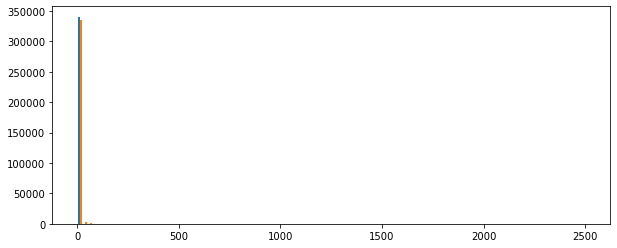

In [ ]:
plt.figure(figsize=(10,4))
plt.hist(ratings, bins=100)
plt.show()

# Step 04: Deletion of low support values

In [ ]:
_tmp = ratings[ratings['rating-count']> 50]

In [ ]:
isbn_to_delete = ratings[ratings['rating-count']< 150]

In [ ]:
isbn_to_delete

,Book-Rating,rating-count
ISBN,,
1558745157,3.852349,149
0425133540,1.610738,149
0671004107,3.540541,148
0060958022,3.439189,148
0451177096,3.175676,148
...,...,...
0801064090,0.000000,1
0801064252,5.000000,1
0801064279,0.000000,1


In [ ]:
isbn_to_delete = list(isbn_to_delete.index.values)

In [ ]:
BX_Book_Ratings = BX_Book_Ratings.set_index('ISBN')

In [ ]:
BX_Book_Ratings = BX_Book_Ratings.drop(isbn_to_delete)

# Step 05: Building pivot table

$\;\;\;\;$ The pivot table can not create in a tiny laptop if the dataset is very large. Because depend on RAM, so need to get the highrating or in other data set is a most important feature score.

In [ ]:
BX_Book_Ratings.shape

(93716, 2)

In [ ]:
pivot_table = BX_Book_Ratings.pivot_table(index='User-ID',columns='ISBN',values='Book-Rating')
pivot_table.head()

ISBN,002542730X,0060175400,0060391626,0060392452,0060502258,0060915544,0060921145,0060928336,0060930535,0060934417,...,0871136791,0971880107,140003065X,1400031354,1400034779,155874262X,1558743669,1559029838,1573225789,1573229326
User-ID,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pivot_table.shape

(26436, 361)

# Step 06: Generations of correlation

In [ ]:
# Custom method for the dataset
def name_for_ISBN(ISBN, df = BX_Books):
    row = df.loc[df['ISBN'] == ISBN]
    print(row[['Book-Title','Book-Author','Year-Of-Publication','Publisher']])

In [ ]:
name_for_ISBN('0439139600')

                                        Book-Title    Book-Author  \
6933  Harry Potter and the Goblet of Fire (Book 4)  J. K. Rowling   

      Year-Of-Publication              Publisher  
6933                 2002  Scholastic Paperbacks  


In [ ]:
book  = pivot_table['0439139600']

In [ ]:
book

User-ID
9        NaN
14       NaN
16       NaN
26       NaN
42       NaN
          ..
278832   NaN
278836   NaN
278843   NaN
278844   NaN
278854   NaN
Name: 0439139600, Length: 26436, dtype: float64

In [ ]:
similar_books = pivot_table.corrwith(book)

C:\Users\Chaand\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Chaand\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [ ]:
similar_books = pd.DataFrame(similar_books, columns=['Correlation'])

In [ ]:
similar_books = similar_books.dropna()
similar_books.sort_values('Correlation', ascending=False)

,Correlation
ISBN,
038550120X,1.000000
0449212602,1.000000
0439139600,1.000000
0515126772,0.998224
0671027387,0.998067
...,...
0399501487,-0.534106
0553582755,-0.536842
0440235596,-0.564049


# Step 07: Recommendations

In [ ]:
similar_books = similar_books.join(ratings)

In [ ]:
similar_books

,Correlation,Book-Rating,rating-count
ISBN,,,
002542730X,0.344615,3.514620,171
0060175400,0.485073,3.802326,172
0060391626,0.586264,3.666667,171
0060392452,-0.339569,4.356890,283
0060502258,0.170025,3.430851,376
...,...,...,...
155874262X,0.919933,3.575610,205
1558743669,0.620557,4.091603,262
1559029838,0.170025,2.355556,180


In [ ]:
BX_Books = BX_Books.set_index('ISBN')

In [ ]:
similar_books = similar_books.join(BX_Books[['Book-Title', 'Book-Author']])

In [ ]:
similar_books.sort_values(['Correlation', 'rating-count'], ascending=[False, False]).head(50)

,Correlation,Book-Rating,rating-count,Book-Title,Book-Author
ISBN,,,,,
038550120X,1.000000,3.336957,184,A Painted House,JOHN GRISHAM
0449212602,1.000000,3.454212,273,The Handmaid's Tale,Margaret Atwood
0439139600,1.000000,5.103627,193,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling
0515126772,0.998224,2.952941,170,Jewels of the Sun (Irish Trilogy),Nora Roberts
0671027387,0.998067,2.862348,247,Deception Point,Dan Brown
0515128554,0.997807,3.011765,170,Heart of the Sea (Irish Trilogy),Nora Roberts
0446606189,0.997722,3.111111,198,Cat & Mouse (Alex Cross Novels),James Patterson
0451172817,0.997156,3.496855,159,Needful Things,Stephen King
1400031354,0.995043,3.975248,202,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith


In [ ]:
similar_books.shape

(340, 5)

In [ ]:
# https://grouplens.org/datasets/movielens/25m/       #Try this